In [1]:
# Installer les bibliothèques nécessaires
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 2.0 MB/s eta 0:00:00


In [2]:
# Imports et configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## visualisation des distributions

In [4]:
print(" Chargement des données nettoyées...")

df = pd.read_csv('data_cleaned.csv')
print(f" Données chargées: {df.shape[0]} lignes, {df.shape[1]} colonnes")
display(df.head())

 Chargement des données nettoyées...
 Données chargées: 1529 lignes, 32 colonnes


,price,log_price,area,rooms,bedrooms,bathrooms,jardin,piscine,cuisine_equiped,terrasse,garage,quartier,price_per_m2,rooms_per_area,bed_bath_ratio,equipment_score,"type_Maisons et Villas, à vendre","type_Villas et Riads, à vendre",type_appartement,type_bureau,type_maison,type_studio,type_villa,property_state_10-20 ans,property_state_20-30 ans,property_state_30-50 ans,property_state_5-10 ans,property_state_50-70 ans,property_state_70-100 ans,property_state_Moins d'un an,property_state_Plus de 100 ans,quartier_encoded
0,14000000.0,16.454568,2.635418,0.647163,1.436265,1.368185,-0.196781,-0.159644,-0.331027,-0.291833,-0.513455,Souissi,1.528971,-1.572938,0.517924,-0.543183,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,1.965406
1,1980000.0,14.498608,-0.471447,-0.705494,-0.819884,-1.292940,-0.196781,-0.159644,-0.331027,-0.291833,-0.513455,Agdal,0.328778,-0.068397,1.382036,-0.543183,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,-0.337058
2,8900000.0,16.001562,4.325609,1.548934,1.436265,0.481143,-0.196781,-0.159644,-0.331027,-0.291833,-0.513455,Riyad,-0.923780,-1.642798,0.997986,-0.543183,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,1.604185
3,7500000.0,15.830414,3.140372,1.548934,0.684215,1.368185,-0.196781,-0.159644,-0.331027,-0.291833,-0.513455,Riyad,-0.784538,-1.401419,0.229886,-0.543183,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1.604185
4,7900000.0,15.882373,4.318596,1.548934,0.684215,0.481143,-0.196781,-0.159644,-0.331027,-0.291833,-0.513455,Riyad,-1.139919,-1.641673,0.613936,-0.543183,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1.604185


In [5]:
# Analyse exploratoire – info & stats
print("\n Analyse exploratoire des données...")

print("\n Informations sur les colonnes:")
df.info()

print("\n Statistiques descriptives:")
display(df.describe().round(2))

print("\n Valeurs manquantes par colonne:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



 Analyse exploratoire des données...

 Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   price                             1529 non-null   float64
 1   log_price                         1529 non-null   float64
 2   area                              1529 non-null   float64
 3   rooms                             1144 non-null   float64
 4   bedrooms                          1153 non-null   float64
 5   bathrooms                         837 non-null    float64
 6   jardin                            1529 non-null   float64
 7   piscine                           1529 non-null   float64
 8   cuisine_equiped                   1529 non-null   float64
 9   terrasse                          1529 non-null   float64
 10  garage                            1529 non-null   float64
 11

,price,log_price,area,rooms,bedrooms,bathrooms,jardin,piscine,cuisine_equiped,terrasse,garage,price_per_m2,rooms_per_area,bed_bath_ratio,equipment_score,quartier_encoded
count,1529.00,1529.00,1529.00,1144.00,1153.00,837.00,1529.00,1529.00,1529.00,1529.00,1529.00,1529.00,1144.00,1529.00,1529.00,1529.00
mean,2852408.04,14.58,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,2253313.82,0.80,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,6000.00,8.70,-1.01,-1.61,-1.57,-1.29,-0.20,-0.16,-0.33,-0.29,-0.51,-2.86,-2.33,-0.92,-0.54,-1.56
25%,1340000.00,14.11,-0.57,-0.71,-0.82,-0.41,-0.20,-0.16,-0.33,-0.29,-0.51,-0.76,-0.73,-0.92,-0.54,-0.78
50%,2200000.00,14.60,-0.33,-0.25,-0.07,-0.41,-0.20,-0.16,-0.33,-0.29,-0.51,-0.01,0.03,0.23,-0.54,-0.34
75%,3650000.00,15.11,0.12,0.20,-0.07,0.48,-0.20,-0.16,-0.33,-0.29,-0.51,0.68,0.61,0.81,0.67,0.34
max,16000000.00,16.59,4.53,8.76,5.95,4.92,5.08,6.26,3.02,3.43,1.95,2.89,6.62,7.14,5.52,1.97



 Valeurs manquantes par colonne:
rooms             385
bedrooms          376
bathrooms         692
rooms_per_area    385
dtype: int64


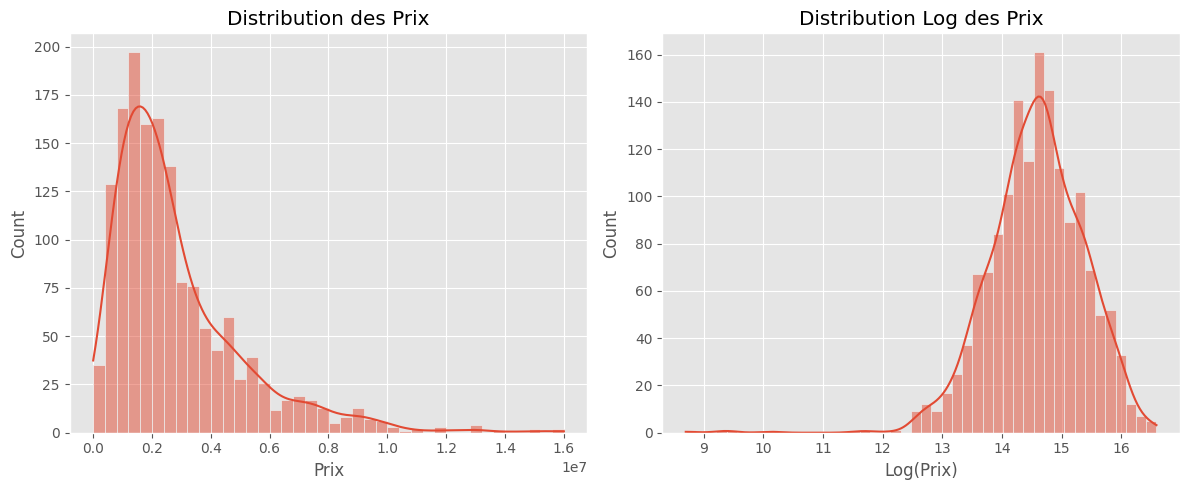

In [6]:
# Visualisation de la distribution de la variable cible
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution des Prix')
plt.xlabel('Prix')

plt.subplot(1, 2, 2)
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution Log des Prix')
plt.xlabel('Log(Prix)')

plt.tight_layout()
plt.show()

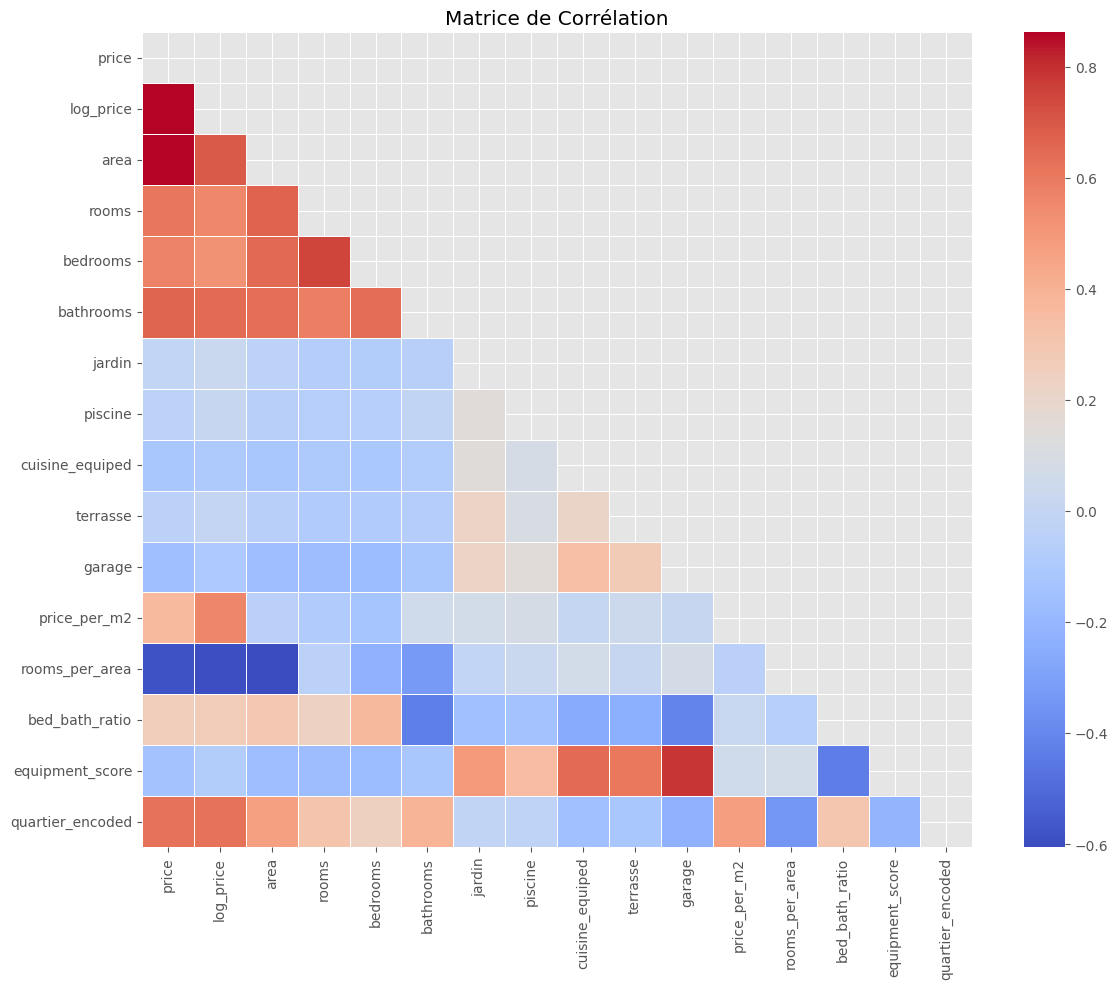

In [7]:
# Analyse des corrélations
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

In [9]:

# Nous utiliserons log_price pour les modèles
target_column = 'log_price'
price_column = 'price'  # Conserver l'information du prix original pour l'évaluation finale

# Filtrer les colonnes pour les features
# Exclure les variables liées au prix et les variables textuelles ou redondantes
exclude_columns = ['price', 'log_price', 'quartier']
feature_columns = [col for col in df.columns if col not in exclude_columns]

print(f"Variable cible: {target_column}")
print(f"Nombre de features: {len(feature_columns)}")

Variable cible: log_price
Nombre de features: 29


In [10]:
# Division en ensembles d'entraînement et de test
X = df[feature_columns]
y = df[target_column]
y_original = df[price_column]


In [15]:
# Ajout de l'imputation des valeurs manquantes avant la division train/test
from sklearn.impute import SimpleImputer

# Initialiser l'imputer (remplace les NaNs par la moyenne de la colonne)
imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)

# X est maintenant un numpy array après imputation. Convertissons-le à nouveau en DataFrame pour garder les noms de colonnes
X = pd.DataFrame(X, columns=feature_columns)


X_train, X_test, y_train, y_test, y_orig_train, y_orig_test = train_test_split(
    X, y, y_original, test_size=0.2, random_state=42)

print(f"Dimensions de X_train: {X_train.shape}, X_test: {X_test.shape}")

Dimensions de X_train: (1223, 29), X_test: (306, 29)


## modélisation

In [16]:
# Fonction d'évaluation des modèles utilisant la métrique originale (non log-transformée)
def evaluate_model(model, X_test, y_test, y_orig_test, model_name, is_log_target=True):
    y_pred = model.predict(X_test)
    y_pred_original = np.expm1(y_pred) if is_log_target else y_pred
    mae = mean_absolute_error(y_orig_test, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y_orig_test, y_pred_original))
    r2 = r2_score(y_orig_test, y_pred_original)
    results = {'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}
    if is_log_target:
        results.update({
            'Log MAE': mean_absolute_error(y_test, y_pred),
            'Log RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'Log R2 Score': r2_score(y_test, y_pred)
        })
    return results

In [17]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=7),
    "SVR (RBF Kernel)": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

In [18]:
results = []
print("\nEntraînement et évaluation des modèles...")
for name, model in models.items():
    print(f"Entraînement du modèle: {name}")
    model.fit(X_train, y_train)
    model_results = evaluate_model(model, X_test, y_test, y_orig_test, name, is_log_target=True)
    results.append(model_results)
    print(f"  - MAE: {model_results['MAE']:.2f}")
    print(f"  - RMSE: {model_results['RMSE']:.2f}")
    print(f"  - R2 Score: {model_results['R2 Score']:.4f}")
    print(f"  - Log R2 Score: {model_results['Log R2 Score']:.4f}")


Entraînement et évaluation des modèles...
Entraînement du modèle: Linear Regression
  - MAE: 608815.90
  - RMSE: 1343642.93
  - R2 Score: 0.6940
  - Log R2 Score: 0.8356
Entraînement du modèle: Ridge Regression
  - MAE: 605933.69
  - RMSE: 1336019.17
  - R2 Score: 0.6975
  - Log R2 Score: 0.8358
Entraînement du modèle: Lasso Regression
  - MAE: 612653.23
  - RMSE: 1346155.57
  - R2 Score: 0.6929
  - Log R2 Score: 0.8344
Entraînement du modèle: XGBoost
  - MAE: 109934.68
  - RMSE: 297861.00
  - R2 Score: 0.9850
  - Log R2 Score: 0.9381
Entraînement du modèle: Random Forest
  - MAE: 119875.45
  - RMSE: 423730.80
  - R2 Score: 0.9696
  - Log R2 Score: 0.9580
Entraînement du modèle: Gradient Boosting
  - MAE: 109451.91
  - RMSE: 332450.00
  - R2 Score: 0.9813
  - Log R2 Score: 0.9618
Entraînement du modèle: KNN Regressor
  - MAE: 527015.14
  - RMSE: 964081.74
  - R2 Score: 0.8425
  - Log R2 Score: 0.8215
Entraînement du modèle: SVR (RBF Kernel)
  - MAE: 255803.47
  - RMSE: 590260.51
  - R

In [19]:
results_df = pd.DataFrame(results)
display(results_df)

,Model,MAE,RMSE,R2 Score,Log MAE,Log RMSE,Log R2 Score
0,Linear Regression,608815.904626,1.343643e+06,0.694012,0.198726,0.340626,0.835644
1,Ridge Regression,605933.685174,1.336019e+06,0.697474,0.198477,0.340482,0.835782
2,Lasso Regression,612653.233812,1.346156e+06,0.692866,0.199617,0.341961,0.834353
3,XGBoost,109934.682649,2.978610e+05,0.984963,0.049992,0.209080,0.938077
4,Random Forest,119875.454365,4.237308e+05,0.969569,0.042298,0.172094,0.958047
5,Gradient Boosting,109451.911314,3.324500e+05,0.981268,0.042847,0.164241,0.961789
6,KNN Regressor,527015.142626,9.640817e+05,0.842470,0.194374,0.354992,0.821488
7,SVR (RBF Kernel),255803.465164,5.902605e+05,0.940949,0.098568,0.258347,0.905455


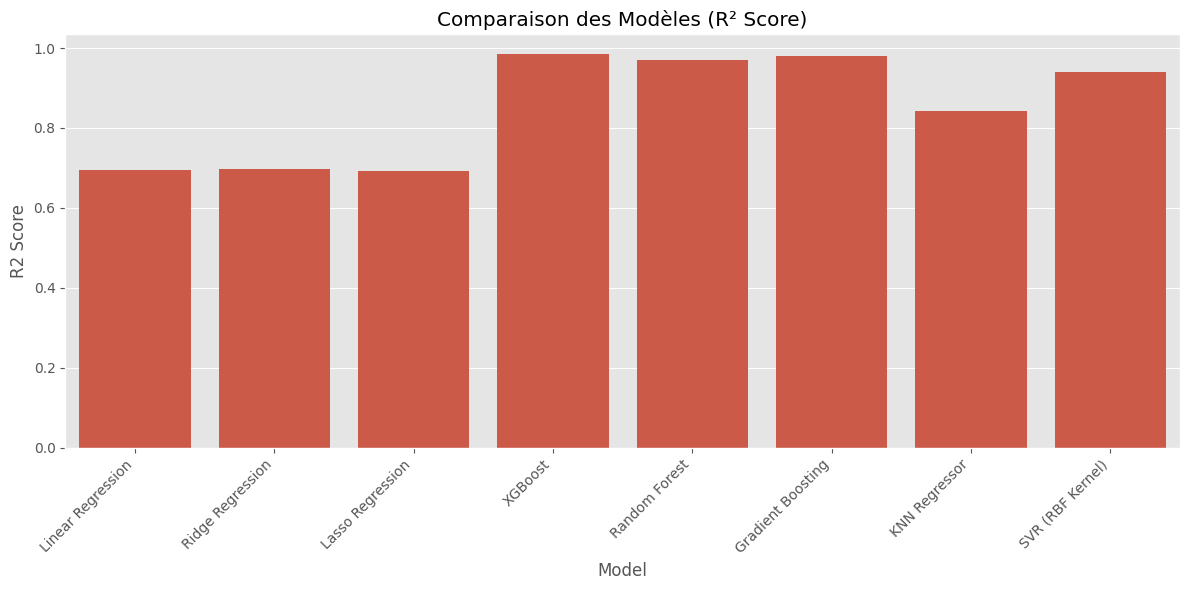

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title('Comparaison des Modèles (R² Score)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [21]:
best_model_idx = results_df['R2 Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model = models[best_model_name]
print(f"\nMeilleur modèle: {best_model_name}")
print(f"R2 Score: {results_df.loc[best_model_idx, 'R2 Score']:.4f}")


Meilleur modèle: XGBoost
R2 Score: 0.9850


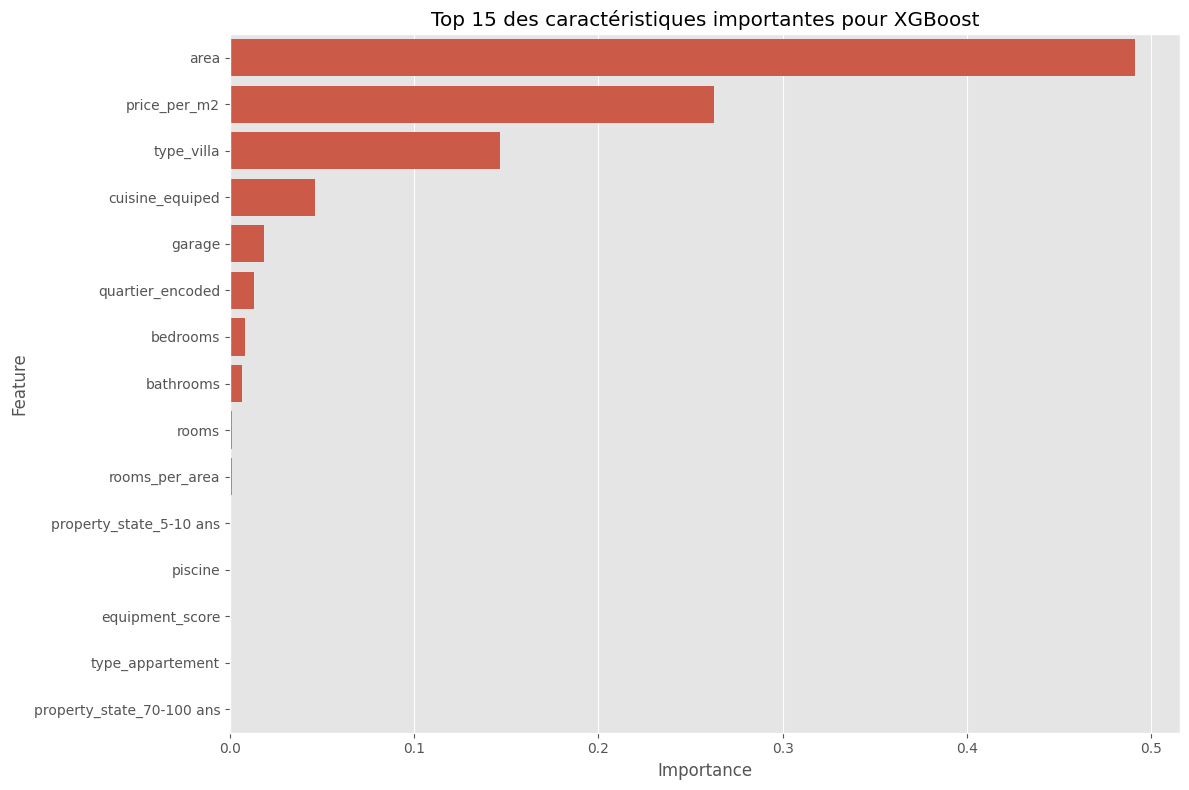

,Feature,Importance
0,area,0.491050
9,price_per_m2,0.262717
19,type_villa,0.146733
6,cuisine_equiped,0.046161
8,garage,0.018368
28,quartier_encoded,0.013254
2,bedrooms,0.007992
3,bathrooms,0.006751
1,rooms,0.001379
10,rooms_per_area,0.001282


In [26]:
if best_model_name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title(f'Top 15 des caractéristiques importantes pour {best_model_name}')
    plt.tight_layout()
    plt.show()
    display(feature_importance.head(10))


In [27]:
print("\nOptimisation des hyperparamètres...")
param_grid = {}
if best_model_name == "Random Forest":
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
elif best_model_name == "XGBoost":
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
elif best_model_name == "Gradient Boosting":
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
elif best_model_name in ["Ridge Regression", "Lasso Regression"]:
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
elif best_model_name == "KNN Regressor":
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
elif best_model_name == "SVR (RBF Kernel)":
    param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1], 'epsilon': [0.01, 0.1, 0.2]}

if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Meilleurs hyperparamètres pour {best_model_name}: {grid_search.best_params_}")
    optimized_results = evaluate_model(grid_search.best_estimator_, X_test, y_test, y_orig_test, f"{best_model_name} (Optimized)", is_log_target=True)
    for key, value in optimized_results.items():
        if key != 'Model':
            print(f"  - {key}: {value:.4f}")
    best_model = grid_search.best_estimator_



Optimisation des hyperparamètres...
Meilleurs hyperparamètres pour XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
  - MAE: 104225.5901
  - RMSE: 259281.4055
  - R2 Score: 0.9886
  - Log MAE: 0.0461
  - Log RMSE: 0.1844
  - Log R2 Score: 0.9518


In [28]:
import joblib

# Sauvegarde du modèle entraîné
xgb_model = models["XGBoost"]
joblib.dump(xgb_model, "xgboost_model.pkl")
print("Modèle XGBoost sauvegardé sous 'xgboost_model.pkl'")


Modèle XGBoost sauvegardé sous 'xgboost_model.pkl'


In [29]:
# Chargement
xgb_model_loaded = joblib.load("xgboost_model.pkl")

# Prédictions
y_pred_log = xgb_model_loaded.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Retour à l'échelle normale si la cible était en log


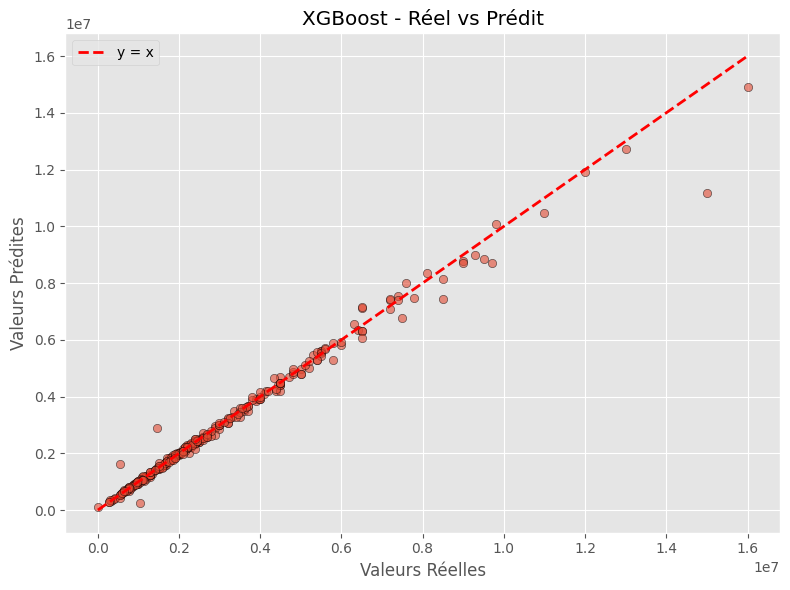

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_orig_test, y=y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_orig_test.min(), y_orig_test.max()],
         [y_orig_test.min(), y_orig_test.max()],
         color='red', lw=2, linestyle='--', label='y = x')

plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("XGBoost - Réel vs Prédit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

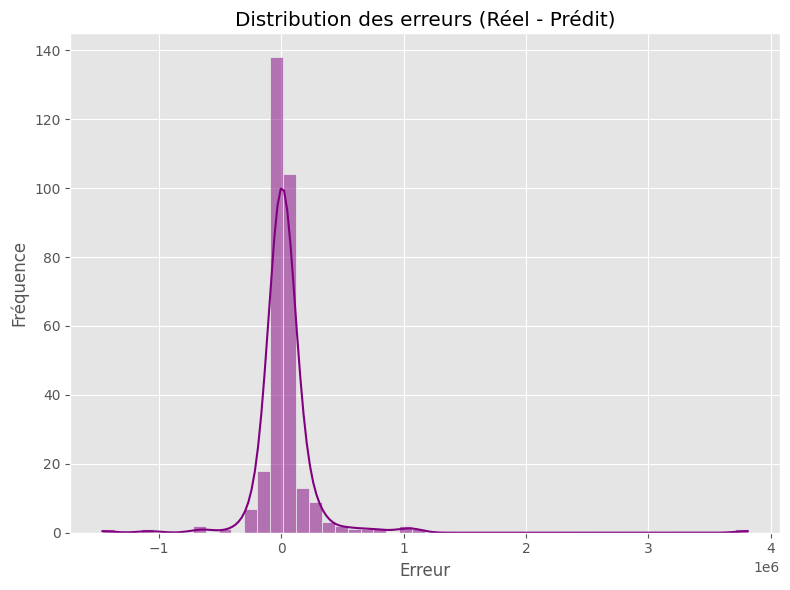

In [31]:
errors = y_orig_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50, kde=True, color="purple")
plt.title("Distribution des erreurs (Réel - Prédit)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()


## Dashboard

In [33]:
!pip install dash dash-bootstrap-components scikit-learn joblib --quiet
!pip install --upgrade --ignore-installed category_encoders
!pip install --upgrade --ignore-installed dash



error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 M

  Using cached dash-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached werkzeug-3.0.6-py3-none-any.whl.metadata (3.7 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached dash-3.0.4-py3-none-any.whl (7.9 MB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 105.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C
